<p style="text-align: center;">
    <p><strong>Spring 2025 BAA1030 Data Analytics & Story Telling (20074)</strong></p>
    <p><strong>Name:</strong> Prathusha Rengarajan</p>
    <p><strong>Student ID:</strong> A00010708</p>
    <p><strong>Programme:</strong> MSc in Management (Business)</p>
</p>

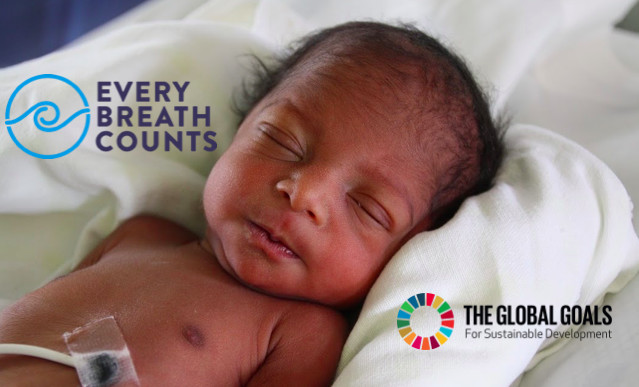

## **EXECUTIVE SUMMARY**
<p>This report explores the global situation regarding careseeking behaviors for Acute Respiratory Infection (ARI) among children under five years old. ARI remains a leading cause of child mortality worldwide, and the urgency for timely medical intervention is critical. Using UNICEF-provided datasets, this report includes 6 different visualizations created with Python Plotnine library which reveal important patterns, disparities, and trends, aiming to raise public awareness and inform data-driven actions for child health interventions on a global scale.</p>


## **INTRODUCTION**
<p>Acute Respiratory Infections (ARI) pose a serious threat to child survival, taking the lives of nearly 800,000 children under the age of five every year. Pneumonia, the most severe form of ARI, remains a leading cause of these deaths. Despite being preventable and treatable, ARI continues to devastate vulnerable communities, especially where access to timely healthcare is limited. Deep-rooted inequalities that are often driven by economic hardship, weak health systems, and social barriers mean that millions of children still go without the life-saving care they urgently need.
<br>Therefore, this report analyzes the "Careseeking for ARI" indicator using UNICEF data and presents key findings through a series of visualizations to encourage incorporation of such early careseeking behavior as it critically helps reduce the global burden of ARI and could potentially save more young lives.</p>





In [1]:
#| title: GDP and Life Expectancyimport pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *
import plotly.express as px


In [2]:
indicator_df = pd.read_csv('./unicef_indicator_1.csv')
metadata_df = pd.read_csv('./unicef_metadata.csv')

In [3]:
indicator_total = indicator_df[indicator_df['sex'] == 'Total']
merged_df = pd.merge(indicator_total, metadata_df, left_on=['alpha_3_code', 'time_period'], right_on=['alpha_3_code', 'year'])
#merged_df = pd.merge(indicator_total, metadata_df, left_on=['alpha_3_code', 'time_period'], right_on=['alpha_3_code', 'year'], how='inner')

## **HEAT WORLD MAP**

INSIGHTS:


*  Higher careseeking rates are concentrated in Latin America, Southeast Asia, and Eastern Europe, reflecting stronger healthcare access and awareness.

* Sub-Saharan Africa and parts of South Asia show consistently low rates, exposing severe healthcare access gaps and systemic inequalities.

* Missing or incomplete data in several countries highlights critical weaknesses in health reporting and surveillance systems.

* Some middle-income countries still report low careseeking, suggesting that economic growth alone does not guarantee healthcare utilization.

In [4]:
# Calculate country means for averaged plots
country_means = merged_df.dropna().groupby('country_x').mean(numeric_only =True).reset_index()

In [5]:
country_means_obs = indicator_total.groupby(['country', 'alpha_3_code'])['obs_value'].mean().reset_index()
# Rename the 'obs_value' column to 'Care-Seeking Percentage'
country_means_obs = country_means_obs.rename(columns={'obs_value': 'Care-Seeking Percentage'})
# Round off the 'Care-Seeking Percentage' values to 2 decimal places
country_means_obs['Care-Seeking Percentage'] = country_means_obs['Care-Seeking Percentage'].round(2)
fig = px.choropleth(
    country_means_obs,
    locations='alpha_3_code',
    color='Care-Seeking Percentage',  # Use the new column name
    hover_name='country',
    hover_data={'alpha_3_code': False,  # Hide alpha_3_code from hover data
                'Care-Seeking Percentage': True}, # Keep care seeking percentage
    color_continuous_scale=px.colors.sequential.Plasma,
    title='CHILD RESPIRATORY ILLNESS: A CROSS-NATIONAL COMPARISON'
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Care Seeking %",  # <-- Change this text!
        title_side="right",            # Make the title above the color bar
        title_font=dict(size=14),    # Optional: control font size
    ),
)
fig.show()

<b>KEY HIGHLIGHT:  </b>              

Careseeking for ARI is deeply tied to geography, health infrastructure, and social factors, revealing that a child's survival often depends more on their birthplace than on the treatability of the disease.
To address these inequalities, efforts must focus on expanding healthcare access, strengthening community health programs, and improving data collection for better-informed interventions.

## **STACKED AREA GRAPH**

INSIGHT:

* The gender gap in ARI care-seeking is evident across many countries, with girls receiving better treatment in some regions due to caregiving dynamics or cultural preferences.

* In contrast, certain regions display a preference for boys, where gender biases lead to prioritized healthcare for them, reflecting deep-seated socio-cultural norms.

* The interactive country dropdown allows users to explore data for specific nations, uncovering how gender dynamics influence care-seeking patterns based on local cultural contexts.

* Overall, the area graph suggests that boys tend to have higher access to ARI treatment, but this varies widely across different regions.

In [6]:
filtered_df = indicator_df[indicator_df['sex'].isin(['Male', 'Female'])]
grouped_df = filtered_df.groupby(['time_period', 'sex'])['obs_value'].mean().reset_index()

# Round off 'Care-Seeking %' to 2 decimal places (or any desired precision)
grouped_df['Care-Seeking %'] = grouped_df['obs_value'].round(2)

import plotly.express as px

fig = px.area(grouped_df,
    x='time_period',
    y='Care-Seeking %',
    color='sex',
    title='GENDER DYNAMICS IN GLOBAL ARI CARE-SEEKING',
    hover_data={'time_period':False,  # Hide the original 'time_period' from hover data
                'Time Period':grouped_df['time_period'],  # Add a new 'Time Period' column for hover data
              'sex':False, # Hide original 'sex'
                'Sex':grouped_df['sex']}, # Display 'Sex' with capital S
    # range_y=[20, 80]  # set y-axis from 20 to 80
              )

fig.update_layout(
    xaxis_title='Time Period',
    yaxis_title='Care-Seeking Percentage',
    template='plotly_white',
    width=1000,
    height=600,
    legend_title_text='Sex'  # This line updates the legend title
)

fig.show()

<b>KEY HIGHLIGHT:</b>

The persistent gender gap in ARI care-seeking highlights the need for policies that challenge cultural biases and promote equitable healthcare access for all children, regardless of gender.

## **SCATTERPLOT WITH TREND LINE**

INSIGHTS:

* Wealthier countries generally have higher careseeking rates due to better healthcare systems.

* Some lower-income countries maintain high careseeking rates, showing that health policies and outreach matter.

* The scatterplot reveals that GDP alone does not fully explain careseeking behavior; non-economic factors like government prioritization of healthcare, access to education, and public health infrastructure play a significant role.

* A few high-income countries also exhibit lower careseeking rates, suggesting that economic wealth doesn't automatically translate into effective healthcare utilization without supporting policies and services.

In [7]:
import plotly.express as px

# Drop NaN values for the relevant columns
plot_df = merged_df.dropna(subset=['GDP per capita (constant 2015 US$)', 'obs_value'])

# Round off 'obs_value' to 2 decimal places using .loc
plot_df.loc[:, 'obs_value'] = plot_df['obs_value'].round(2)

# Create an enhanced scatter plot
fig = px.scatter(
    plot_df,
    x='GDP per capita (constant 2015 US$)',
    y='obs_value',
    color='obs_value',
    color_continuous_scale='Viridis',  # Better color scale for density
    trendline='ols',
    trendline_color_override='black',  # Make the trendline clean black
    title='GDP PER CAPITA Vs. CHILDREN SEEKING TREATMENT FOR ARI (%)',
    labels={
        'GDP per capita (constant 2015 US$)': 'GDP per Capita (constant 2015 US$)',
        'obs_value': 'Care-Seeking Percentage'
    },
    hover_data={'obs_value':':.2f'} # Format hover data to 2 decimal places
)

# Update layout for a more elegant look
fig.update_layout(
    title_font_size=22,
    plot_bgcolor='white',  # White background
    xaxis=dict(
        gridcolor='lightgray',
        zeroline=False
    ),
    yaxis=dict(
        gridcolor='lightgray',
        zeroline=False
    ),
    coloraxis_colorbar=dict(
        title='Care-Seeking Percentage',
        tickformat='.2f'  # Format colorbar ticks to 2 decimal places
    )
)
fig.update_layout(
    coloraxis_colorbar=dict(
        title="ARI Treatment (%)",  # <-- Change this text!
        title_side="right",            # Make the title above the color bar
        title_font=dict(size=14),    # Optional: control font size
    ),
)
# Display the plot
fig.show()

<b>KEY HIGHLIGHT:</b>
Economic development positively influences careseeking, but strong health policies and public health efforts are critical in ensuring high careseeking rates, even in lower-income countries.

## **BAR GRAPH**



INSIGHTS:

* Top 5 countries with careseeking rates above 80% reflect strong healthcare systems and high health-seeking behavior.

* Bottom 5 countries, with rates below 30%, face significant barriers to healthcare access, risking untreated ARI in children.


* While the top performers may offer insights into successful healthcare strategies, the bottom countries need targeted solutions that focus on accessibility, affordability, and community health education to reduce preventable ARI-related deaths.

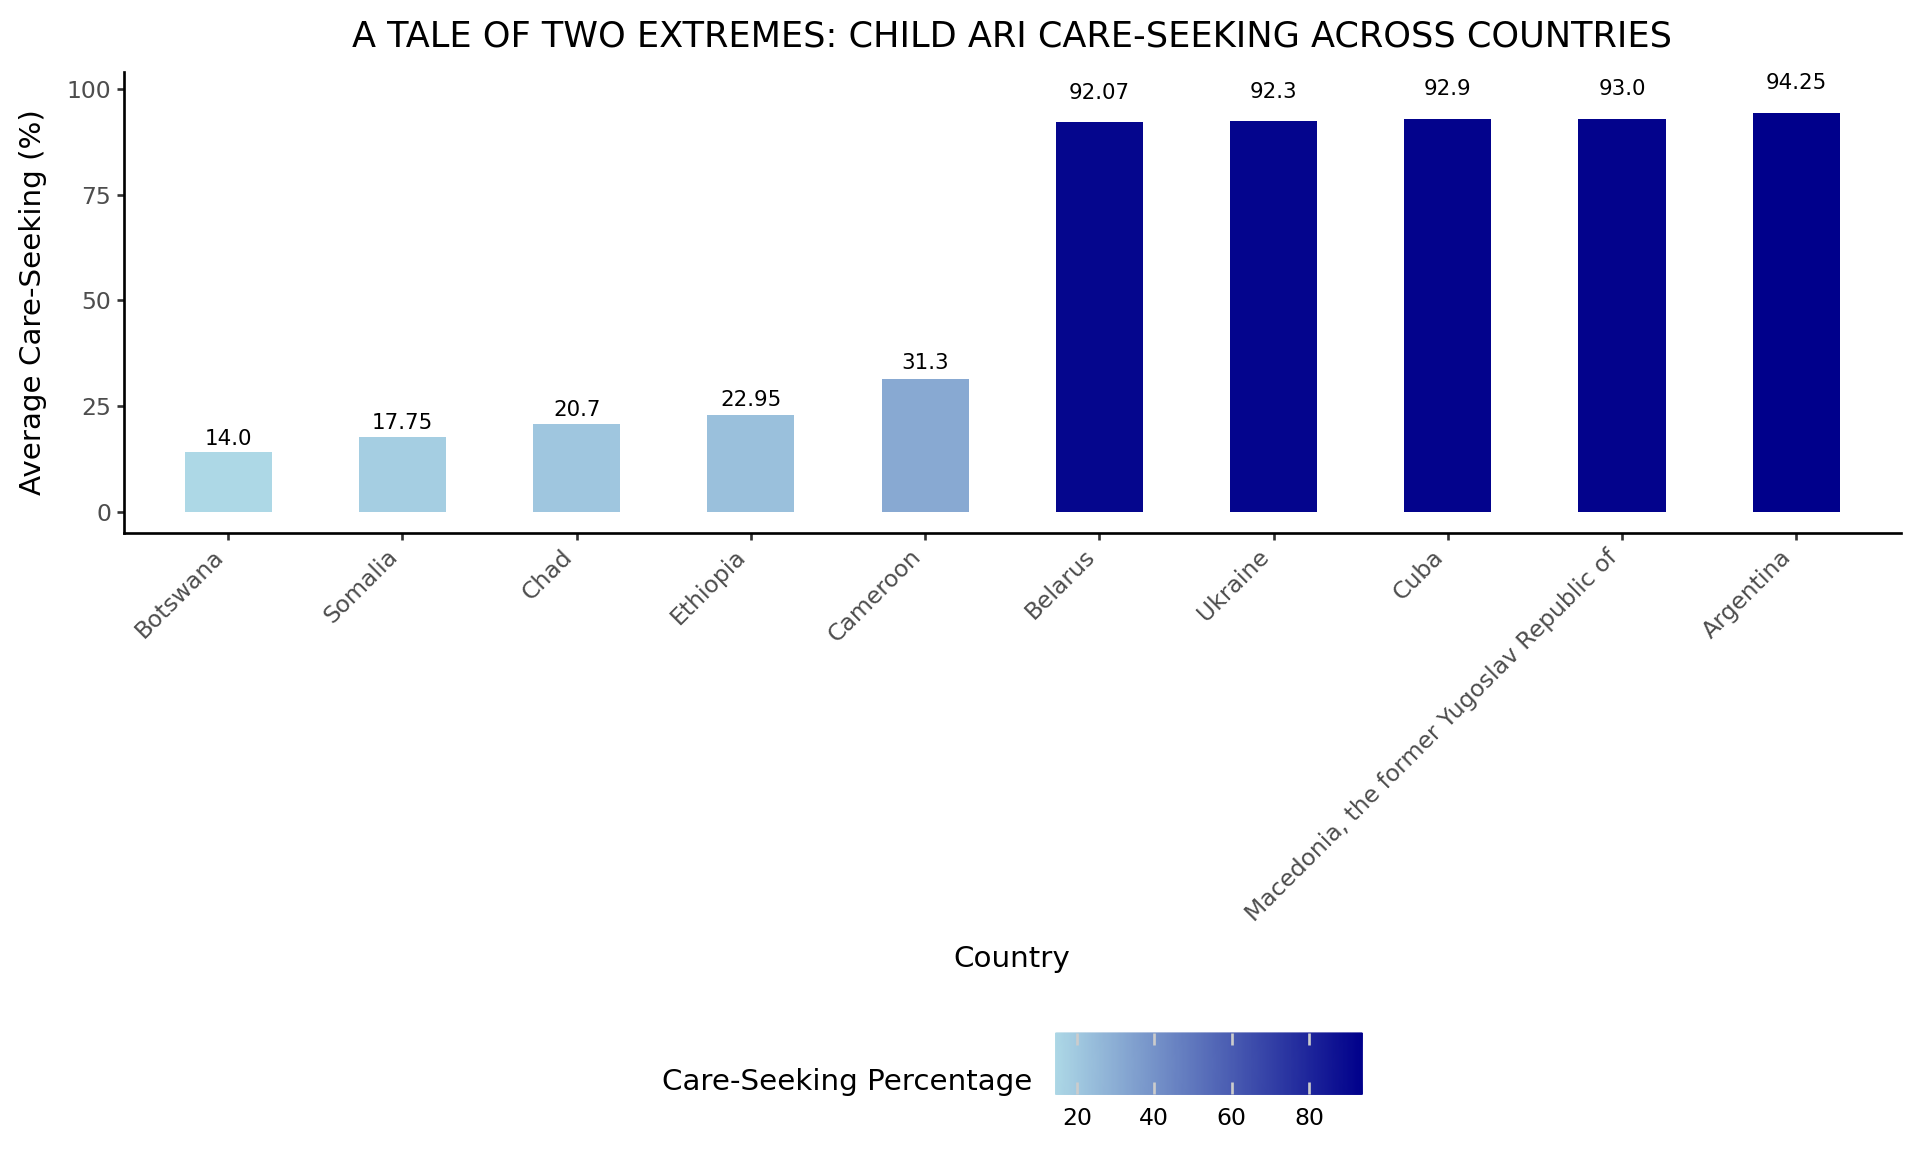

In [8]:
from plotnine import ggplot, aes, geom_col, scale_fill_gradient, theme_classic, labs, theme, element_text, geom_text

final_means_df = indicator_total.groupby(['country', 'alpha_3_code'])['obs_value'].mean().reset_index()
top_5 = final_means_df.sort_values('obs_value', ascending=False).head(5)
bottom_5 = final_means_df.sort_values('obs_value', ascending=True).head(5)
final_df = top_5._append(bottom_5)

# Assuming final_df is your dataframe and it contains the 'country' and 'obs_value' columns
p = (
    ggplot(final_df, aes(x='reorder(country, obs_value)', y='obs_value', fill='obs_value')) +
    geom_col(width=0.5) +
    scale_fill_gradient(low='lightblue', high='darkblue') +
    geom_text(
        aes(label=after_stat('round(y, 2)')),  # Changed 'value' to 'y' to access the calculated value
        va='bottom',  # Vertical alignment to place text on top of bars
        size=8,  # Adjust text size as needed
        color='black',  # Set the text color
        position=position_stack(vjust=1.05)  # Adjust position for better visibility, if needed
    ) +
    theme_classic() +
    labs(
        x='Country',
        y='Average Care-Seeking (%)',
        title='A TALE OF TWO EXTREMES: CHILD ARI CARE-SEEKING ACROSS COUNTRIES',
        fill='Care-Seeking Percentage'  # This line changes the legend title
    ) +
    theme(
        figure_size=(10, 6),
        axis_text_x=element_text(rotation=45, hjust=1),  # Rotate x labels
        legend_position="bottom",  # Position legend at the bottom
        legend_direction="horizontal",  # Make legend horizontal
        legend_title=element_text(ha='center')  # Center align legend title using ha instead of align
    )
)

p.show()

<b>KEY HIGHLIGHT:</b>

The significant disparity between the highest and lowest countries underscores the urgent need for focused global health strategies to reduce inequality in child healthcare, particularly for treating preventable diseases like ARI.


## **DUAL-LINE GRAPH**

INSIGHT:

* High-income countries (e.g., USA, Germany, Japan) show strong ARI treatment rates and higher life expectancy, as sustained economic growth enables better healthcare systems.

* Lower-income nations consistently show lower ARI care-seeking and shorter life spans, highlighting how limited healthcare access directly suppresses child survival and overall longevity.

* Economic gains only improve health when paired with deliberate investment in accessible healthcare; wealth without health focus delays survival improvements.

* Some middle-income countries outperform their income peers in life expectancy due to targeted health policies, external aid, or successful public health programs, showing that strategic health interventions can sometimes offset economic limitations.

In [9]:
# Prepare ARI Treatment Data
ARI_data = indicator_df[indicator_df['indicator'].str.contains('ARI', case=False, na=False)]
ARI_data = ARI_data.rename(columns={'time_period': 'year'})

# Prepare Life Expectancy Data
life_expectancy_data = metadata_df[['country', 'year', 'Life expectancy at birth, total (years)']]
life_expectancy_data = life_expectancy_data.rename(columns={'Life expectancy at birth, total (years)': 'Life Expectancy (Years)'})

# Merge Data
merged_data = pd.merge(
    ARI_data[['country', 'year', 'obs_value']],
    life_expectancy_data,
    on=['country', 'year']
)

# Calculate country averages
averaged_data = merged_data.groupby('country')[['obs_value', 'Life Expectancy (Years)']].mean().reset_index()

# Melt for Plotly
plot_data_melted = averaged_data.melt(
    id_vars=["country"],
    value_vars=["obs_value", "Life Expectancy (Years)"],
    var_name="Indicator Type",
    value_name="Value"
)

# Rename indicators and round off obs_value
plot_data_melted['Indicator Type'] = plot_data_melted['Indicator Type'].replace({
    'obs_value': 'ARI Treatment (%)'
})
plot_data_melted['Value'] = plot_data_melted['Value'].round(2)  # Round to 2 decimal places

# Create a smoothed and more interactive line plot
import plotly.express as px  # Make sure to import plotly.express

fig = px.line(
    plot_data_melted,
    x="country",  # Changed x-axis to 'country'
    y="Value",
    color="Indicator Type",
    markers=True,  # Add markers
    hover_data={"country": True, "Indicator Type": True, "Value": True},
    title="LINKING HEALTHCARE ACCESS & LONGEVITY: ARI TREATMENT Vs. LIFE EXPECTANCY"  # Updated title
)

fig.update_layout(
    xaxis_title="Country",  # Updated x-axis title
    yaxis_title="Care-Seeking (%)",
    height=650,
    width=950,
    legend_title="Key Parameters",  # Changed legend title
)

fig.show()

<b>KEY HIGHLIGHT:</b>

The dual trajectory of ARI treatment and life expectancy serves as a powerful illustration that economic prosperity, when coupled with strong healthcare investment, becomes a decisive engine for extending human life. Without prioritizing accessible child healthcare, even economic gains struggle to translate into longer, healthier lives.

## **LINE GRAPH WITH ANNOTATIONS**


INSIGHT:

* Global careseeking rates show a steady increase, particularly after 2010, driven by improved healthcare access.

* Also in 2015, with the introduction of new health policies for ARI treatment in children resulted in a noticeable boost in careseeking behavior.

* Simultaneously, some regions experience stagnation or declines, often due to political instability or health crises like COVID-19.

* Progress varies significantly by region, with some making rapid improvements, while others struggle with infrastructure and political barriers.

* Crisis highlight the need for localized, context-specific solutions.

In [10]:
import plotly.graph_objects as go

annotations_dict = {
    2020: "COVID-19 Impact on Treatment Seeking Behavior for ARI in Children",
    2015: "Introduction of New Health Policy for ARI Treatment in Children",
    2010: "Increase in Awareness and Access to Healthcare Services for Children"
}

global_trend = indicator_total.groupby('time_period')['obs_value'].mean().reset_index()
global_trend['obs_value'] = global_trend['obs_value'].apply(lambda x: round(x, 2))

fig = px.scatter(
    global_trend,
    x='time_period',
    y='obs_value',
    color='obs_value',
    color_continuous_scale='Viridis',
    labels={
        'time_period': 'Year',
        'obs_value': 'Children Receiving <br> Treatment for ARI (%)'
    },
    title='HOW THE WORLD HAS TREATED ARI IN CHILDREN: THEN & NOW'
)

frames = []
all_years = list(global_trend['time_period'])

for idx, year in enumerate(all_years):
    current_annotation = []
    if year in annotations_dict:
        current_annotation = [dict(
            x=year,
            y=global_trend.loc[global_trend['time_period'] == year, 'obs_value'].values[0],
            text=annotations_dict[year],
            showarrow=True,
            arrowhead=2,
            ax=40,
            ay=-40,
            font=dict(color="black", size=14),
            bgcolor="lightyellow",
            bordercolor="black",
            borderwidth=1
        )]

    frame = go.Frame(
        data=[go.Scatter(
            x=global_trend.loc[global_trend['time_period'] <= year, 'time_period'],
            y=global_trend.loc[global_trend['time_period'] <= year, 'obs_value'],
            mode='markers+lines',
            marker=dict(
                size=[10 if y == year else 6 for y in global_trend['time_period']],
                color=global_trend['obs_value'],
                colorscale='Viridis',
                showscale=False
            ),
            line=dict(color='lightgray')
        )],
        name=str(year),
        layout=go.Layout(
            annotations=current_annotation  # Only if special year
        )
    )
    frames.append(frame)

    if year in annotations_dict and idx + 1 < len(all_years):
        next_year = all_years[idx + 1]
        frame_clear = go.Frame(
            data=[go.Scatter(
                x=global_trend.loc[global_trend['time_period'] <= next_year, 'time_period'],
                y=global_trend.loc[global_trend['time_period'] <= next_year, 'obs_value'],
                mode='markers+lines',
                marker=dict(
                    size=[10 if y == next_year else 6 for y in global_trend['time_period']],
                    color=global_trend['obs_value'],
                    colorscale='Viridis',
                    showscale=False
                ),
                line=dict(color='lightgray')
            )],
            name=str(next_year),
            layout=go.Layout(
                annotations=[] 
            )
        )
        frames.append(frame_clear)

fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    updatemenus=[{
        "type": "buttons",
        "buttons": [{
            "label": "▶️ Play",
            "method": "animate",
            "args": [None, {
                "frame": {"duration": 800, "redraw": True},
                "fromcurrent": True,
                "transition": {"duration": 500, "easing": "cubic-in-out"}
            }]
        }]
    }],
    sliders=[{
        "steps": [{
            "method": "animate",
            "label": str(year),
            "args": [[str(year)], {
                "mode": "immediate",
                "frame": {"duration": 800, "redraw": True},
                "transition": {"duration": 500}
            }]}
        for year in all_years],
        "transition": {"duration": 500},
        "x": 0.1,
        "y": -0.2,
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Year: ",
            "visible": True,
            "xanchor": "right"
        },
        "len": 0.8
    }]
)

fig.frames = frames
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Care Seeking %", 
        title_side="right", 
        title_font=dict(size=14),
    ),
)

fig.show()


<b>KEY HIGHLIGHT:</b>

While global careseeking rates have generally improved, the impact of crises and policies underscores the need for adaptive, region-specific solutions to ensure consistent progress.

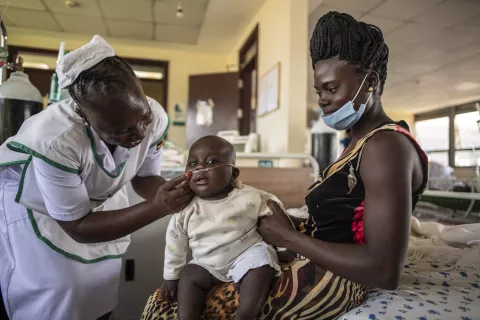

## **CONCLUSION**
The analysis of the UNICEF ARI careseeking dataset reveals critical insights into global child health behaviors. Economic prosperity positively influences careseeking, but it is not the sole determinant. Geopolitical stability, healthcare system strength, cultural beliefs, and education significantly impact health outcomes.

Therefore, while global careseeking trends show improvement, large disparities persist. Policymakers, NGOs, and community health advocates must focus on bridging healthcare access gaps, investing in health education, and strengthening healthcare systems to ensure that every child, regardless of where they are born, receives timely care for acute respiratory infections.